<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Case-1---Temperature-vs-Time" data-toc-modified-id="Case-1---Temperature-vs-Time-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Case 1 - Temperature vs Time</a></span><ul class="toc-item"><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Custom-Model" data-toc-modified-id="Custom-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Custom Model</a></span></li><li><span><a href="#Setup-a-custom-library" data-toc-modified-id="Setup-a-custom-library-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Setup a custom library</a></span></li><li><span><a href="#Configuration-of-DeepMoD" data-toc-modified-id="Configuration-of-DeepMoD-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Configuration of DeepMoD</a></span></li><li><span><a href="#Run-DeepMoD" data-toc-modified-id="Run-DeepMoD-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Run DeepMoD</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#Case-2---Temperature-vs-Time-and-x-,-y-location" data-toc-modified-id="Case-2---Temperature-vs-Time-and-x-,-y-location-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Case 2 - Temperature vs Time and x-, y-location</a></span><ul class="toc-item"><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Configuration-of-DeepMoD" data-toc-modified-id="Configuration-of-DeepMoD-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Configuration of DeepMoD</a></span></li><li><span><a href="#Run-DeepMoD" data-toc-modified-id="Run-DeepMoD-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Run DeepMoD</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#1D-Plot-(T-vs-time)" data-toc-modified-id="1D-Plot-(T-vs-time)-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>1D Plot (T vs time)</a></span></li><li><span><a href="#2D-Plot-(Grid-data-at-one-time)" data-toc-modified-id="2D-Plot-(Grid-data-at-one-time)-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>2D Plot (Grid data at one time)</a></span></li><li><span><a href="#RMSE-for-grid" data-toc-modified-id="RMSE-for-grid-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>RMSE for grid</a></span></li></ul></li><li><span><a href="#Generate-Data-for-TUD" data-toc-modified-id="Generate-Data-for-TUD-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Generate Data for TUD</a></span><ul class="toc-item"><li><span><a href="#Grid-data" data-toc-modified-id="Grid-data-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Grid data</a></span></li></ul></li></ul></li><li><span><a href="#Notes" data-toc-modified-id="Notes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Notes</a></span><ul class="toc-item"><li><span><a href="#Over-fitting" data-toc-modified-id="Over-fitting-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Over fitting</a></span></li><li><span><a href="#Difficulty-of-fitting-data-from-land" data-toc-modified-id="Difficulty-of-fitting-data-from-land-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Difficulty of fitting data from land</a></span></li><li><span><a href="#k_reg" data-toc-modified-id="k_reg-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>k_reg</a></span></li><li><span><a href="#Adding-more-harmonic-term" data-toc-modified-id="Adding-more-harmonic-term-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Adding more harmonic term</a></span></li></ul></li></ul></div>

# Introduction

This file does the main PINNs works.
The first case is mainly for testing. You can jumpy to case 2 directly.

# Import Packages

In [1]:
import sys

import numpy as np
import pandas as pd
import os
import tqdm

from datetime import datetime
from matplotlib import pyplot as plt
import math

import pickle

import torch

In [2]:
# It is assumed that the wwf package is in the same folder. 
# If you want to put it somewhere else, make sure the Python can find and import it.
sys.path.append('./')
import wwf

In [3]:
# It's the same for the DeePyMoD package
sys.path.insert(0, './DeePyMoD/src/')
# DeepMoD functions
from deepymod import DeepMoD
from deepymod.model.func_approx import NN
from deepymod.model.library import Library
from deepymod.model.constraint import LeastSquares
from deepymod.model.sparse_estimators import Threshold,PDEFIND
from deepymod.training import train
from deepymod.training.sparsity_scheduler import TrainTestPeriodic

In [4]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Settings for reproducibility
# np.random.seed(42)
# torch.manual_seed(0)

In [5]:
torch.cuda.is_available()

True

# Case 1 - Temperature vs Time

Try a simple case, mainly for testing the work flow of DeePyMod




## Data Pre-processing

In [6]:
# Input of the raw data and output for the CSV files
# Since the data has been processed, we don't need to set those
# dir in this Notebook
root = ''
output_dir = ''

In [7]:
# Using the Ds083p2Handler to help handling the data
dsh = wwf.Ds083p2Handler(root, output_dir)

In [8]:
# Load data
dsh.df = pd.read_pickle('./dataframe.pk.zip')

Get the input data for NNs: time and temperature

In [9]:
# Get the 'TMP' data at 'surface' for (lon, lat)
data_lon = -15
data_lat = 28
dsh.get_time_series_data('TMP', 'surface', data_lon, data_lat)

,Time1,Time2,Para,Alt,Lon,Lat,Val,Houridx
1512,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-15,28,293.300,333095.0
3569,2008-01-02 00:00:00,2008-01-02 00:00:00,TMP,surface,-15,28,293.400,333119.0
5626,2008-01-03 00:00:00,2008-01-03 00:00:00,TMP,surface,-15,28,293.300,333143.0
7683,2008-01-04 00:00:00,2008-01-04 00:00:00,TMP,surface,-15,28,293.200,333167.0
9740,2008-01-05 00:00:00,2008-01-05 00:00:00,TMP,surface,-15,28,293.100,333191.0
...,...,...,...,...,...,...,...,...
13892518,2021-03-21 00:00:00,2021-03-21 00:00:00,TMP,surface,-15,28,291.566,448967.0
13896666,2021-03-22 00:00:00,2021-03-22 00:00:00,TMP,surface,-15,28,291.300,448991.0
13900935,2021-03-23 00:00:00,2021-03-23 00:00:00,TMP,surface,-15,28,291.362,449015.0
13905508,2021-03-24 00:00:00,2021-03-24 00:00:00,TMP,surface,-15,28,291.256,449039.0


In [10]:
# Time in days
time_array = dsh.time_df['Houridx'].to_numpy()/24.0
# Shift the time, so the data starts from 0
time_array -= time_array[0]
# Temperature in K
temperature_array = dsh.time_df['Val'].to_numpy()
n_total = time_array.shape[0]
print(f'Number of data points: {n_total}')

Number of data points: 4832


In [11]:
# Test remove mean temperature
temperature_array -= np.mean(temperature_array)

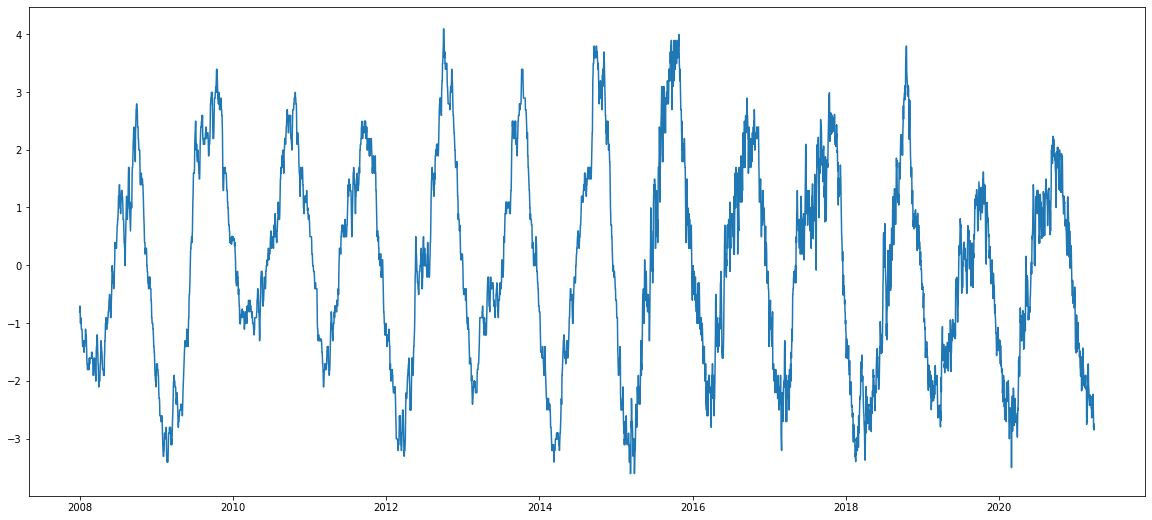

In [13]:
plt.figure(figsize=(20, 9))
plt.plot(time_array/365.0+2008, temperature_array)


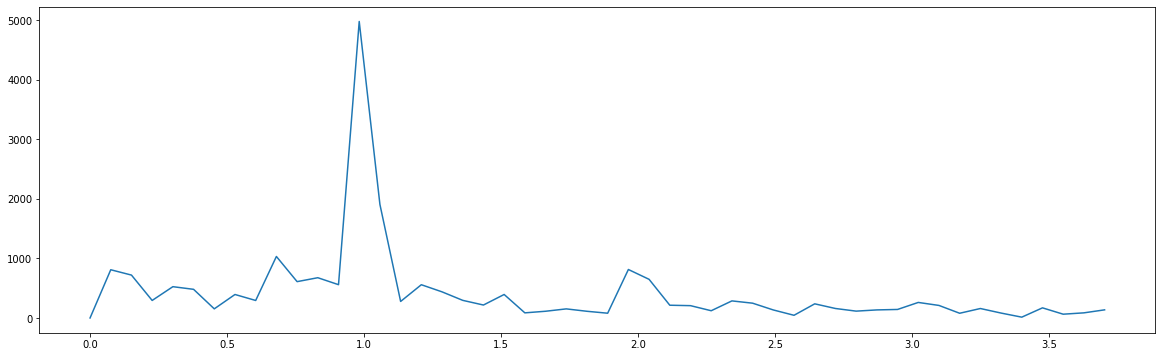

In [14]:
# Use FFT to check the frequency components of the data
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(temperature_array)
xf = rfftfreq(n_total, 1.0/365.0)

n_p = 50

plt.figure(figsize=(20, 6))
plt.plot(xf[:n_p], np.abs(yf)[:n_p])
plt.show()

In [15]:
# Use the first n_train data for training
n_train = 365*10

In [16]:
X_train = torch.tensor( time_array[:n_train].reshape((-1, 1)), dtype=torch.float32, requires_grad=True)
Y_train = torch.tensor(temperature_array[:n_train].reshape((-1, 1)), dtype=torch.float32)

In [17]:
X_train.shape

torch.Size([3650, 1])

In [18]:
Y_train.shape

torch.Size([3650, 1])

In [19]:
n_input = X_train.shape[1]
n_input

1

## Custom Model

In [20]:
from typing import *

class SinCosLayer(torch.nn.Module):
    def __init__(
        self,
        p_list: List[float]
    ) -> None:
        """Sin/Cos activation function layer with different period.
        Args:

        """
        super().__init__()
        self.p_list = p_list

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """Forward pass through the layer.
        Args:
            input (torch.Tensor): Input tensor of shape (n_samples, n_inputs).
        Returns:
            torch.Tensor: Prediction of shape (n_samples, n_outputs)
        """
        n_in = input.shape[1]
        n_p = len(self.p_list)
        
        sincos_list = []
        for i in range(n_p):
            omega = 2.0*np.pi/self.p_list[i]
            
            sincos_list.append(torch.sin(omega*input[:, 0:1]))
            sincos_list.append(torch.cos(omega*input[:, 0:1]))
            
        output = torch.cat([input] + sincos_list, dim=1)
        
        return output       
        

class SCNN(torch.nn.Module):
    def __init__(self, n_in: int, n_hidden: List[int], n_out: int, p_list: List[float]) -> None:
        """Constructs a feed-forward neural network with tanh activation.
        Args:
            n_in (int): Number of input features.
            n_hidden (List[int]): Number of neurons in each layer.
            n_out (int): Number of output features.
            p_list (List[float]): list of sin/cos period
        """
        super().__init__()
        self.p_list = p_list
        self.network = self.build_network(n_in, n_hidden, n_out, p_list)

    def forward(self, input: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        """Forward pass through the network. Returns prediction and the differentiable input
        so we can construct the library.
        Args:
            input (torch.Tensor): Input tensor of size (n_samples, n_inputs).
        Returns:
            (torch.Tensor, torch.Tensor): prediction of size (n_samples, n_outputs) and coordinates of size (n_samples, n_inputs).
        """
        coordinates = input.clone().detach().requires_grad_(True)
        return self.network(coordinates), coordinates

    def build_network(self, n_in: int, n_hidden: List[int], n_out: int, p_list: [float]) -> torch.nn.Sequential:
        """Constructs a feed-forward neural network.
        Args:
            n_in (int): Number of input features.
            n_hidden (list[int]): Number of neurons in each layer.
            n_out (int): Number of output features.
            p_list (List[float]): list of sin/cos period
        Returns:
            torch.Sequential: Pytorch module
        """

        network = [SinCosLayer(p_list)]
        
        n_sc_out = n_in + len(p_list) * 2
        
        architecture = [n_sc_out] + n_hidden + [n_out]
        for layer_i, layer_j in zip(architecture, architecture[1:]):
            network.append(torch.nn.Linear(layer_i, layer_j))
            network.append(torch.nn.Tanh())
        network.pop()  # get rid of last activation function
        return torch.nn.Sequential(*network)

## Setup a custom library

In this notebook we show how the user can create a custom build library.The library function, $\theta$, in this case contains $[1,u,v, sin(u)]$ to showcase that non-linear terms can easily be added to the library

In [21]:
from torch.autograd import grad
from itertools import combinations, product
from functools import reduce
from typing import Tuple
import ipdb

In [22]:
class Library_nonlinear(Library):
    """[summary]

    Args:
        Library ([type]): [description]
    """
    def __init__(self, period_list) -> None:
        super().__init__()
        self.period_list = period_list
        
        self.cal_count = 0

    #def library(self, input: Tuple[torch.Tensor, torch.Tensor]) -> Tuple[TensorList, TensorList]:
    def library(self, input):
        prediction, data = input
        samples = prediction.shape[0]
        
        n_order = int((data.shape[1] - 1)/2.0)
                
        # Construct the theta matrix
        C = torch.ones_like(prediction[:,0]).view(samples, -1)
        
        # ipdb.set_trace()
        
        time_array = data[:, 0:1]
        arg_state_list = []
        for i in range(len(self.period_list)):
            omega = 2.0*np.pi/self.period_list[i]
            arg_state_list.append(torch.sin(time_array*omega)*omega)
            arg_state_list.append(torch.cos(time_array*omega)*omega) 
        
        #arg_state_list = []
        #for i in range(n_order):
        #    arg_state_list.append(data[:, 2*i+2].view(samples, -1))
        #    arg_state_list.append(data[:, 2*i+1].view(samples, -1)*-1.0)
        
        theta = torch.cat([C] + arg_state_list, dim=1)
    
        # Construct a list of time_derivatives 
        time_deriv_list = []
        for output in torch.arange(prediction.shape[1]):
            dy = grad(prediction[:,output], data, grad_outputs=torch.ones_like(prediction[:,output]), create_graph=True, allow_unused=True)[0]
            time_deriv = dy[:, 0:1]
            time_deriv_list.append(time_deriv)       
        
        if self.cal_count > 50:
            # ipdb.set_trace()
            t_pred = prediction[:,0].detach().numpy()
            time_array = data[:, 0].detach().numpy()
            plt.plot(time_array, time_deriv.detach().numpy(), 'r')

            # plt.plot(time_array, t_pred, 'b')
            
            plt.plot(time_array[1:], t_pred[1:]-t_pred[:-1], 'k')

            plt.show()
        
       # self.cal_count += 1

        
        
        return time_deriv_list, [theta[:, 1:]]


## Configuration of DeepMoD

Configuration of the function approximator: Here the first argument is the number of input and the last argument the number of output layers.

In [23]:
p_list_nn = np.array([1.0/12.0, 0.75, 1.0, 1.5, 2.0])*365.0
p_list_de = np.array([0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0])*365.0

In [24]:
n_input

1

In [25]:
network = SCNN(n_input, [40, 40, 40, 40], 1, p_list_nn)

In [26]:
library = Library_nonlinear(p_list_de) 

Configuration of the sparsity estimator and sparsity scheduler used. In this case we use the most basic threshold-based Lasso estimator and a scheduler that asseses the validation loss after a given patience. If that value is smaller than 1e-5, the algorithm is converged.  

In [27]:
estimator = Threshold(0.01) 
sparsity_scheduler = TrainTestPeriodic(periodicity=50, patience=10, delta=1e-5) 

Configuration of the sparsity estimator 

In [28]:
constraint = LeastSquares() 
# Configuration of the sparsity scheduler

Now we instantiate the model and select the optimizer 

In [29]:
model = DeepMoD(network, library, estimator, constraint)

# Defining optimizer
optimizer = torch.optim.Adam(model.parameters(), betas=(0.99, 0.99), amsgrad=True, lr=2e-3) 


## Run DeepMoD 

We can now run DeepMoD using all the options we have set and the training data:
* The directory where the tensorboard file is written (log_dir)
* The ratio of train/test set used (split)
* The maximum number of iterations performed (max_iterations)
* The absolute change in L1 norm considered converged (delta)
* The amount of epochs over which the absolute change in L1 norm is calculated (patience)

In [30]:
train(model, X_train, Y_train, optimizer, sparsity_scheduler, log_dir='runs/C3/', split=0.9, max_iterations=100000, delta=1e-3, patience=8) 

2021-09-27 14:11:15.804374: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-27 14:11:15.804396: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


IndexError: index 1 is out of bounds for dimension 0 with size 1

Sparsity masks provide the active and non-active terms in the PDE:

In [ ]:
model.sparsity_masks

estimatior_coeffs gives the magnitude of the active terms:

In [ ]:
print(model.estimator_coeffs())

## Plot

In [ ]:
in_test = np.arange(0, 365*30, 1)
out_test = np.zeros(in_test.shape)
out_test.shape

In [ ]:
for i in range(in_test.shape[0]):
    t = in_test[i]
    in_data = [[t]]
        
    out_test[i] = model.func_approx(torch.Tensor(in_data))[0].item()
    

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(in_test/365.0+2008, out_test, 'b', label='Model')
plt.plot(time_array[:n_train]/365.0+2008, temperature_array[:n_train], '*', label='Train Data')
plt.plot(time_array[n_train:]/365.0+2008, temperature_array[n_train:], 'sr', label='Test Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel('T')
plt.savefig('./output/model.jpg')

# Case 2 - Temperature vs Time and x-, y-location

In this case, both the time and 2D location is used as input.

## Data Pre-processing

In [9]:
# Input of the raw data and output for the CSV files
# Since the data has been processed, we don't need to set those
# dir in this Notebook
root = ''
output_dir = ''

In [ ]:
dsh = wwf.Ds083p2Handler(root, output_dir)

In [ ]:
# Load data

dsh.df = pd.read_pickle('./dataframe.pk.zip')

Get the input data for NNs: time, lon, lat, and temperature

In [10]:
df_grid = dsh.get_grid_data('TMP', 'surface')
df_grid


,Time1,Time2,Para,Alt,Lon,Lat,Val,Houridx
1452,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-20,23,294.600,333095.0
1453,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-19,23,294.000,333095.0
1454,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-18,23,293.200,333095.0
1455,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-17,23,292.500,333095.0
1456,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-16,23,288.100,333095.0
...,...,...,...,...,...,...,...,...
13910137,2021-03-25 00:00:00,2021-03-25 00:00:00,TMP,surface,-14,33,290.542,449063.0
13910138,2021-03-25 00:00:00,2021-03-25 00:00:00,TMP,surface,-13,33,290.242,449063.0
13910139,2021-03-25 00:00:00,2021-03-25 00:00:00,TMP,surface,-12,33,290.242,449063.0
13910140,2021-03-25 00:00:00,2021-03-25 00:00:00,TMP,surface,-11,33,290.142,449063.0


Select only a part of the grid for the PINSS

In [11]:
# Number of grid points on one side of the center
N_ONE_SIDE = 2

# The center point
LON_0 = -16.0
LAT_0 = 29.0

lon_list = [LON_0]
lat_list = [LAT_0]

for i in range(1, N_ONE_SIDE + 1):
    lon_list += [LON_0 - i, LON_0 + i]
    lat_list += [LAT_0 - i, LAT_0 + i]
    
lon_list.sort()
lat_list.sort()
print(f'Lon list: {lon_list}')
print(f'Lat list: {lat_list}')

Lon list: [-18.0, -17.0, -16.0, -15.0, -14.0]
Lat list: [27.0, 28.0, 29.0, 30.0, 31.0]


In [12]:
# Grap sub-set of the data
n_grid = len(lon_list) * len(lat_list)
df_grid = df_grid[(df_grid['Lon'].isin(lon_list)) & (df_grid['Lat'].isin(lat_list))]
df_grid

,Time1,Time2,Para,Alt,Lon,Lat,Val,Houridx
1498,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-18,27,294.200,333095.0
1499,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-17,27,293.900,333095.0
1500,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-16,27,293.500,333095.0
1501,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-15,27,293.000,333095.0
1502,2008-01-01 00:00:00,2008-01-01 00:00:00,TMP,surface,-14,27,292.800,333095.0
...,...,...,...,...,...,...,...,...
13910111,2021-03-25 00:00:00,2021-03-25 00:00:00,TMP,surface,-18,31,291.642,449063.0
13910112,2021-03-25 00:00:00,2021-03-25 00:00:00,TMP,surface,-17,31,291.242,449063.0
13910113,2021-03-25 00:00:00,2021-03-25 00:00:00,TMP,surface,-16,31,290.842,449063.0
13910114,2021-03-25 00:00:00,2021-03-25 00:00:00,TMP,surface,-15,31,290.842,449063.0


In [13]:
# shift and normlize the time for 10 years
SHIFT_YEAR = 10.0

# Time in Year
time_array = df_grid['Houridx'].to_numpy().copy()/24.0/365.0
# Shift the time, so the data starts from 0
time_array -= time_array[0]

# Normlize the time data
time_array = (time_array - SHIFT_YEAR)/SHIFT_YEAR

# Temperature in K
temperature_array = df_grid['Val'].to_numpy().copy()
n_total = time_array.shape[0]
print(f'Number of data points: {n_total}')

Number of data points: 120800


In [14]:
# Normalize the lon/lat data
lon_array = (df_grid['Lon'].to_numpy().copy() - LON_0)/float(N_ONE_SIDE)
lat_array = (df_grid['Lat'].to_numpy().copy() - LAT_0)/float(N_ONE_SIDE)

In [15]:
# Remove mean temperature

MEAN_TEMP = np.mean(temperature_array)

print(f'The mean temperature is {MEAN_TEMP}')

temperature_array -= MEAN_TEMP

The mean temperature is 294.1563100165563


In [16]:
# The input will be [time, lon, lat]
X_arg = np.concatenate( [time_array.reshape(-1, 1), lon_array.reshape(-1, 1), lat_array.reshape(-1, 1)], axis=1)
X_arg

array([[-1.        , -1.        , -1.        ],
       [-1.        , -0.5       , -1.        ],
       [-1.        ,  0.        , -1.        ],
       ...,
       [ 0.32383562,  0.        ,  1.        ],
       [ 0.32383562,  0.5       ,  1.        ],
       [ 0.32383562,  1.        ,  1.        ]])

In [17]:
# Use the first n_year data for training
N_YEAR_TRAIN = 10.0
n_train = int(365*N_YEAR_TRAIN*n_grid)

In [18]:
X_train = torch.tensor( X_arg[:n_train, :], dtype=torch.float32, requires_grad=True)
Y_train = torch.tensor(temperature_array[:n_train].reshape((-1, 1)), dtype=torch.float32)


In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [ ]:
n_input = X_train.shape[1]
n_input

## Configuration of DeepMoD

In [19]:
# The period used for the NNs
P_LIST_NN = np.array([1.0/12.0, 2.0/12.0, 0.25, 4.0/12.0, 5.0/12.0, 0.5, 0.75, 1.0, 1.25, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0])/SHIFT_YEAR

# The period used for the elements library
P_LIST_DE = np.array([1.0/12.0, 2.0/12.0, 0.25, 4.0/12.0, 5.0/12.0, 0.5, 0.75, 1.0, 1.25, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0])/SHIFT_YEAR


In [20]:
# Order of polynomial components in the NNs
PN = 3

In [22]:
# The NNs model
network = wwf.SCNN(3, [50, 50, 50, 50, 50], 1, P_LIST_NN, pn=PN)

In [23]:
# Customized non-linear library
library = wwf.Library_nonlinear(P_LIST_DE)

Configuration of the sparsity estimator and sparsity scheduler used. In this case we use the most basic threshold-based Lasso estimator and a scheduler that asseses the validation loss after a given patience. If that value is smaller than 1e-5, the algorithm is converged.  

In [24]:
estimator = Threshold(0.01)
sparsity_scheduler = TrainTestPeriodic(periodicity=50, patience=10, delta=1e-5)

Configuration of the sparsity estimator 

In [25]:
constraint = LeastSquares() 

Now we instantiate the model and select the optimizer 

In [26]:
model = DeepMoD(network, library, estimator, constraint)

# Defining optimizer
optimizer = torch.optim.AdamW(model.parameters(), betas=(0.99, 0.99), amsgrad=True, lr=6e-3, weight_decay=0.0001) 


## Run DeepMoD 

We can now run DeepMoD using all the options we have set and the training data:
* The directory where the tensorboard file is written (log_dir)
* The ratio of train/test set used (split)
* The maximum number of iterations performed (max_iterations)
* The absolute change in L1 norm considered converged (delta)
* The amount of epochs over which the absolute change in L1 norm is calculated (patience)
* The weight factor of Lreg (k_reg) (Added by Jia Wan)

In [27]:
train(model, X_train, Y_train, optimizer, sparsity_scheduler,
      log_dir='runs/C12/', split=0.9, max_iterations=100000,
      write_iterations=50, k_reg=0.01, delta=1e-3, patience=100) 

IndexError: tuple index out of range

Sparsity masks provide the active and non-active terms in the PDE:

In [ ]:
model.sparsity_masks[0]

estimatior_coeffs gives the magnitude of the active terms:

In [ ]:
for i in range(model.estimator_coeffs()[0].size):
    coef = model.estimator_coeffs()[0][i, 0]
    if coef != 0.0:
        
        print(f'{coef:+5.3f}\t{model.library.all_ele_name[i]}')

In [ ]:
P_LIST_DE*SHIFT_YEAR

Write or load the model

In [ ]:
with open('output/model.pk', 'wb') as f:
    pickle.dump(model, f)liguem-me.

In [ ]:
with open('output/model_best.pk', 'rb') as f:
    model = pickle.load(f)

## Plot

### 1D Plot (T vs time)

In [ ]:
# Calculate T for 30 years
in_test = (np.arange(0, 30, 0.01) - SHIFT_YEAR)/SHIFT_YEAR
out_test = np.zeros(in_test.shape)

In [ ]:
# The location
lon=-15
lat=28

lon_bar = (lon - LON_0)/float(N_ONE_SIDE)
lat_bar = (lat - LAT_0)/float(N_ONE_SIDE)

idx = round(365.0*N_YEAR_TRAIN)

for i in range(in_test.shape[0]):
    t = in_test[i]
    in_data = [[t, lon_bar, lat_bar]]
        
    out_test[i] = model.func_approx(torch.Tensor(in_data))[0].item()
    

In [ ]:
def get_true_tmp_data(dsh, lon, lat):
    """Get the tmp data from data set (dsh)
    
    """
    df = dsh.get_time_series_data('TMP', lon=lon, lat=lat)
    time = df['Houridx'].to_numpy()/24.0/365.0
    time -= time[0]
    return time, df['Val'].to_numpy() - MEAN_TEMP

In [ ]:
time, T = get_true_tmp_data(dsh, round(lon), round(lat))

In [ ]:
%matplotlib widget

In [ ]:
%matplotlib inline

Plot T v.s. t and save the fig.

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(in_test*SHIFT_YEAR + 2008 + SHIFT_YEAR, out_test, 'b', label='Model')
plt.plot(time[:idx]+2008, T[:idx], '*', label='Train Data')
plt.plot(time[idx:]+2008, T[idx:], 'sr', label='Test Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel('dT (K)')
plt.grid()
plt.savefig('./output/model.jpg')

Calculate the error of model prediction and plot

In [ ]:
err_array = np.zeros(time.shape)
time_bar = (time - SHIFT_YEAR)/SHIFT_YEAR
for i in range(err_array.size):
    in_data = [[time_bar[i], lon_bar, lat_bar]]
        
    err_array[i] = model.func_approx(torch.Tensor(in_data))[0].item() - T[i]

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(time[:idx]+2008, err_array[:idx], '*', label='Train Data')
plt.plot(time[idx:]+2008, err_array[idx:], 'sr', label='Test Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Error (K)')
plt.grid()
plt.savefig('./output/error.jpg')

Calculate MRSE and MAE values

In [ ]:
mrse_train = math.sqrt(np.mean(np.power(err_array[:idx], 2.0)))

In [ ]:
mae_train = np.mean(np.abs(err_array[:idx]))

In [ ]:
mrse_test = math.sqrt(np.mean(np.power(err_array[idx:], 2.0)))

In [ ]:
mae_test = np.mean(np.abs(err_array[idx:]))

In [ ]:
print(f'MRSE train = {mrse_train:6.3f} \tMAE train = {mae_train:6.3f}')
print(f'MRSE test  = {mrse_test:6.3f} \tMAE test  = {mae_test:6.3f}')

### 2D Plot (Grid data at one time)

In [ ]:
def get_grid_data(dsh, model, lon_list, lat_list, time_year, prt=False):
    """Calculate grid T distribution from model and data set
    at given time.
    
    """
    hidx_array = dsh.df['Houridx'].to_numpy()
    hidx_0 = hidx_array[0]
    
    dh = hidx_array - hidx_0 - time_year*365.0*24.0
    
    idx = np.argmin(np.abs(dh))
    
    hidx = hidx_array[idx]
    time_year = hidx/24.0/365.0 - hidx_0/24.0/365.0
    if prt:
        print(hidx, time_year, time_year+2008)
    input_data = []
    for lon in lon_list:
        for lat in lat_list:
            lon_bar = (lon - LON_0)/float(N_ONE_SIDE)
            lat_bar = (lat - LAT_0)/float(N_ONE_SIDE)
            input_data.append([(time_year - SHIFT_YEAR)/SHIFT_YEAR, lon_bar, lat_bar])
    
    output = model.func_approx(torch.tensor(input_data, dtype=torch.float32))[0].detach().numpy()
    
    temp = np.concatenate((np.array(input_data), output), axis=1)
    
    model_df = pd.DataFrame(temp, columns=['Time', 'Lon', 'Lat', 'Val'])
    # print(model_df)
    # ipdb.set_trace()
    
    gt_df = dsh.get_grid_data('TMP', time=hidx)
    gt_df = gt_df[(gt_df['Lon'].isin(lon_list)) & (gt_df['Lat'].isin(lat_list))]
    
    model_array = model_df.pivot('Lat', 'Lon', 'Val').to_numpy()
    gt_array = gt_df.pivot('Lat', 'Lon', 'Val').to_numpy()
    
    return model_array, gt_array - MEAN_TEMP
            

In [ ]:
model_array, gt_array = get_grid_data(dsh, model, lon_list, lat_list, 0.416)

In [ ]:
model_array

In [ ]:
gt_array

In [ ]:
%matplotlib inline

In [ ]:

def plot_grid_data(model_array, gt_array, lon_list, lat_list, fig_name="grid.jpg", show_fig=True):
    """Plot grid T distribution
    
    """
    fig, axes = plt.subplots(ncols=3, figsize=(24, 6))

    temp = np.concatenate((model_array, gt_array))

    vmin = np.min(temp)
    vmax = np.max(temp)
    levels = np.linspace(vmin,vmax, 8)
    levels = np.arange(vmin, vmax+0.2, 0.2)

    im0 = axes[0].contourf(lon_list, lat_list, model_array, cmap='coolwarm', vmin=vmin, vmax=vmax, levels=levels)
    axes[0].set_xlabel('Lon')
    axes[0].set_ylabel('Lat')
    axes[0].set_title('Model')
    axes[0].grid()
    fig.colorbar(im0, ax=axes[0])

    im1 = axes[1].contourf(lon_list, lat_list, gt_array, cmap='coolwarm', vmin=vmin, vmax=vmax, levels=levels)
    axes[1].set_xlabel('Lon')
    axes[1].set_title('Data')
    axes[1].grid()
    fig.colorbar(im1, ax=axes[1])

    im2 = axes[2].contourf(lon_list, lat_list, np.abs(model_array - gt_array), cmap='coolwarm')
    axes[2].set_xlabel('Lon')
    axes[2].set_ylabel('Lat')
    axes[2].set_title('Abs Error')
    axes[2].grid()
    fig.colorbar(im2, ax=axes[2])

    for a in axes:
        a.plot(-15.3, 27.9, 'sk')

    save_name = './output/' + fig_name
    plt.savefig(save_name)
    if show_fig:
        plt.show()
    else:
        plt.close()

In [ ]:
plot_grid_data(model_array, gt_array, lon_list, lat_list)

Now run the same calculation for different timestamps and save all the plots

In [ ]:
grid_err_list = []
for year in tqdm.tqdm(range(13)):
    for month in range(12):
        time_y = float(year) + float(month)/12.0
        # print(time_y, year+2008, month+1)
        fig_name = f'grid_{year+2008}_{month+1:>02d}.jpg'
        # print(fig_name)
        model_array, gt_array = get_grid_data(dsh, model, lon_list, lat_list, time_y)
        
        plot_grid_data(model_array, gt_array, lon_list, lat_list, fig_name=fig_name, show_fig=False)
        
        grid_err_list.append(model_array - gt_array)

### RMSE for grid

In [ ]:
import math

Calculate the RMSE for grid data at all timestamps

In [ ]:
grid_err = model.func_approx(torch.Tensor(X_arg))[0].detach().numpy() - temperature_array.reshape((-1, 1))

In [ ]:
RMSE_grid = np.zeros(time.shape)

i = 0
while True:
    idx0 = i*n_grid
    idx1 = (i+1)*n_grid
    if idx0 >= grid_err.shape[0]:
        break
        
    RMSE_grid[i] = math.sqrt(np.mean(np.power(grid_err[idx0:idx1], 2.0)))
    i += 1

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(time[:idx]+2008, RMSE_grid[:idx], '*', label='Train Data')
plt.plot(time[idx:]+2008, RMSE_grid[idx:], 'sr', label='Test Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel('RMSE Grid')
plt.grid()

## Generate Data for TUD

### Grid data
Generate a txt file with time, location and temperature

In [ ]:
time_year_array = (np.arange(0, 30, 0.01) - SHIFT_YEAR)/SHIFT_YEAR 
input_data = []
raw_data = []
for i in range(time_year_array.size):
    for lon in lon_list:
        for lat in lat_list:
            lon_bar = (lon - LON_0)/float(N_ONE_SIDE)
            lat_bar = (lat - LAT_0)/float(N_ONE_SIDE)
            input_data.append([time_year_array[i], lon_bar, lat_bar])
            raw_data.append([time_year_array[i]*SHIFT_YEAR+SHIFT_YEAR, lon, lat])

output = model.func_approx(torch.tensor(input_data, dtype=torch.float32))[0].detach().numpy() + MEAN_TEMP

In [ ]:
output = np.concatenate((np.array(raw_data), output), axis=1)
output

In [ ]:
np.savetxt('output/FM_model_data.csv', output, header='time\tlon\tlat\ttemperature', delimiter='\t')

In [ ]:
# Calculate T for 30 years
N_YEAR = 30

n_point = N_YEAR * 365

output = np.zeros((n_point, 2))

# The location
lon=-15
lat=28

lon_bar = (lon - LON_0)/float(N_ONE_SIDE)
lat_bar = (lat - LAT_0)/float(N_ONE_SIDE)


for i in range(n_point):
    t_y = float(i)/365.0
    t_bar = (t_y - SHIFT_YEAR)/SHIFT_YEAR
    in_data = [[t_bar, lon_bar, lat_bar]]
    
    output[i, 0] = t_y + 2008.0
        
    output[i, 1] = model.func_approx(torch.Tensor(in_data))[0].item() + MEAN_TEMP
    

In [ ]:
output

In [ ]:
np.savetxt('output/FM_one_point_data.csv', output, header='time\ttemperature', delimiter='\t')

# Notes

## Over fitting

Over fitting was experienced during tuning the model, as shown below. Some methods were used to reduce over fitting:

* Data normalization
* Play with the weight_decay parameter
* Play with the k_reg parameter
* Reduce size of NNs


![plot](./output/model_p2f5g5.jpg)


![plot](./output/model_p1f5g5.jpg)


## Difficulty of fitting data from land

With a large area to be modeled, the South-Est part is difficult to fit, which is on land and has higher temperature.


![plot](./output/grid_p2f5g7y13.jpg)

## k_reg

One can play with k_reg to find a good trade-off between MSE and Reg. For example:


With k_reg=0.001 ->   1050  MSE: 2.16e-01  Reg: 1.83e+01  L1: 2.61e+00  dL1: 9.62e-04

With k_reg=0.1 ->   1050  MSE: 3.42e-01  Reg: 7.89e-02  L1: 1.87e+00  dL1: 8.40e-04

With k_reg=1.0 ->   2500  MSE: 5.13e-01  Reg: 2.67e-03  L1: 1.63e+00  dL1: 7.82e-05


## Adding more harmonic term

Try more harmonic components, such as:

p_list_nn = np.concatenate((np.arange(1.0, 13.0), np.arange(14.0, 25.0, 2.0), np.arange(27.0, 37.0, 3.0), np.array([40, 44, 48, 54, 60])))/12.0/shift_year

not helping. training converge very slowly. Large Reg.
